In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rental-bike-sharing/hour.csv
/kaggle/input/rental-bike-sharing/Readme.txt
/kaggle/input/rental-bike-sharing/day.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/rental-bike-sharing/hour.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
df.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df = df.dropna()

In [6]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
number = df[['cnt']]
number

,cnt
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


In [8]:
features = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit']]
features

,season,yr,mnth,hr,holiday,workingday,weathersit
0,1,0,1,0,0,0,1
1,1,0,1,1,0,0,1
2,1,0,1,2,0,0,1
3,1,0,1,3,0,0,1
4,1,0,1,4,0,0,1
...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2
17375,1,1,12,20,0,1,2
17376,1,1,12,21,0,1,1
17377,1,1,12,22,0,1,1


In [9]:
features

,season,yr,mnth,hr,holiday,workingday,weathersit
0,1,0,1,0,0,0,1
1,1,0,1,1,0,0,1
2,1,0,1,2,0,0,1
3,1,0,1,3,0,0,1
4,1,0,1,4,0,0,1
...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2
17375,1,1,12,20,0,1,2
17376,1,1,12,21,0,1,1
17377,1,1,12,22,0,1,1


In [10]:
#features['10pm-6am'] = (features['hr'] == 22)*1
#df['2pm to 10pm'] = (df['hr'] >= 14 & df['hr'] < 22).astype(int)
#df['10pm to 6am'] = (df['hr'] >= 22 | df['hr'] < 6).astype(int)
#df['6am to 2pm'] = (df['hr'] >= 6 & df['hr'] < 14).astype(int) 
features

,season,yr,mnth,hr,holiday,workingday,weathersit
0,1,0,1,0,0,0,1
1,1,0,1,1,0,0,1
2,1,0,1,2,0,0,1
3,1,0,1,3,0,0,1
4,1,0,1,4,0,0,1
...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2
17375,1,1,12,20,0,1,2
17376,1,1,12,21,0,1,1
17377,1,1,12,22,0,1,1


In [11]:
#features.drop(columns='10pm-6am')

In [12]:
features.to_numpy()

array([[ 1,  0,  1, ...,  0,  0,  1],
       [ 1,  0,  1, ...,  0,  0,  1],
       [ 1,  0,  1, ...,  0,  0,  1],
       ...,
       [ 1,  1, 12, ...,  0,  1,  1],
       [ 1,  1, 12, ...,  0,  1,  1],
       [ 1,  1, 12, ...,  0,  1,  1]])

In [13]:
X = features.to_numpy()

In [14]:
Y = number.to_numpy()

In [15]:
X.shape

(17379, 7)

In [16]:
Y.shape

(17379, 1)

In [17]:
Y

array([[16],
       [40],
       [32],
       ...,
       [90],
       [61],
       [49]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2,random_state=4)

In [20]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(13903, 7) (3476, 7) (13903, 1) (3476, 1)


In [21]:
from sklearn import preprocessing

In [22]:
scaler = preprocessing.StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [25]:
X_val_scaled

array([[ 0.45110737,  1.00396384,  0.42417471, ..., -0.17144779,
         0.68192067, -0.66386942],
       [-0.45143195,  1.00396384, -0.7372829 , ..., -0.17144779,
         0.68192067, -0.66386942],
       [-0.45143195,  1.00396384, -0.15655409, ..., -0.17144779,
         0.68192067,  0.89468791],
       ...,
       [-1.35397127, -0.99605181, -1.60837611, ..., -0.17144779,
         0.68192067,  0.89468791],
       [ 1.35364669, -0.99605181,  1.58563233, ..., -0.17144779,
        -1.46644623,  0.89468791],
       [-1.35397127,  1.00396384, -1.60837611, ..., -0.17144779,
        -1.46644623, -0.66386942]])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

2022-08-02 18:19:55.665993: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-02 18:19:55.799235: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
435/435 [==============================] - 1s 2ms/step - loss: 68887.1094 - val_loss: 66918.8125
Epoch 2/100
435/435 [==============================] - 1s 1ms/step - loss: 68603.4141 - val_loss: 66637.4844
Epoch 3/100
435/435 [==============================] - 1s 1ms/step - loss: 68322.1094 - val_loss: 66357.9531
Epoch 4/100
435/435 [==============================] - 1s 1ms/step - loss: 68041.1406 - val_loss: 66078.7031
Epoch 5/100
435/435 [==============================] - 1s 1ms/step - loss: 67761.6016 - val_loss: 65801.6094
Epoch 6/100
435/435 [==============================] - 1s 1ms/step - loss: 67483.6797 - val_loss: 65526.9922
Epoch 7/100
435/435 [==============================] - 1s 1ms/step - loss: 67209.6719 - val_loss: 65254.0352
Epoch 8/100
435/435 [==============================] - 1s 1ms/step - loss: 66935.9375 - val_loss: 64982.3438
Epoch 9/100
435/435 [==============================] - 1s 1ms/step - loss: 66665.7422 - val_loss: 64713.7305
Epoch 10/100
435/43

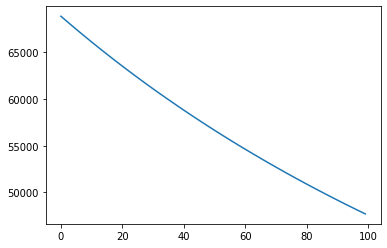

In [27]:
#to erase variable model if we used it before
model = 0

#creates the network, just the input layer
model = Sequential()

#this is the output layer
model.add(Dense(1))

#MSE (numerical problem)
model.compile(loss='MSE')

#find the parameters that minimize the error
model.fit(X_train_scaled,Y_train,epochs=100,verbose=1,validation_data = (X_val_scaled,Y_val))

J_list = model.history.history['loss']

plt.plot(J_list)

In [28]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,68887.109375,66918.812500
1,68603.414062,66637.484375
2,68322.109375,66357.953125
3,68041.140625,66078.703125
4,67761.601562,65801.609375
...,...,...
95,48328.664062,46564.250000
96,48166.558594,46403.339844
97,48003.453125,46243.449219
98,47844.554688,46085.824219


In [29]:
Y_hat = model.predict(X_val_scaled)
(abs(Y_val-Y_hat)/Y_val).mean()

2.0175453563970644

In [30]:
Y_val[0:10]

array([[289],
       [487],
       [  5],
       [ 58],
       [177],
       [ 58],
       [219],
       [ 57],
       [119],
       [599]])

In [31]:
Y_hat[0:10]

array([[101.79791  ],
       [109.16986  ],
       [  1.3824539],
       [ 95.60373  ],
       [ 99.60952  ],
       [-71.00735  ],
       [ 26.849377 ],
       [-81.721825 ],
       [ 67.58045  ],
       [ 74.24377  ]], dtype=float32)